# **Artificial Intelligence & Machine Learning CW**

## **STARBUCKS CORPORATION (SBUX)**

### **Company Selection and Brief Introduction**

The company chosen for the realization of the course work is Starbucks Corporation® listed in the NYSE with ticker (SBUX)

In [1]:
!pip install --user yahooquery

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from yahooquery import Ticker

SBUX = 'SBUX'
ticker = Ticker(SBUX)
company_details = ticker.asset_profile
if SBUX in company_details:
    company_description = company_details[SBUX].get('longBusinessSummary', 'No description found.')
else:
    company_description = 'Company details not found for the provided ticker symbol.'
print(company_description)


Starbucks Corporation, together with its subsidiaries, operates as a roaster, marketer, and retailer of specialty coffee worldwide. The company operates through three segments: North America, International, and Channel Development. Its stores offer coffee and tea beverages, roasted whole beans and ground coffees, single serve products, and ready-to-drink beverages; and various food products, such as pastries, breakfast sandwiches, and lunch items. The company also licenses its trademarks through licensed stores, and grocery and foodservice accounts. The company offers its products under the Starbucks, Teavana, Seattle's Best Coffee, Evolution Fresh, Ethos, Starbucks Reserve, and Princi brands. Starbucks Corporation has company-operated and licensed stores in North America and internationally. The company was founded in 1971 and is based in Seattle, Washington.


In [4]:
key_stats = ticker.key_stats[SBUX]
print (key_stats)

{'maxAge': 1, 'priceHint': 2, 'enterpriseValue': 141803683840, 'forwardPE': 21.907024, 'profitMargins': 0.11465, 'floatShares': 1118708234, 'sharesOutstanding': 1142599936, 'sharesShort': 10310532, 'sharesShortPriorMonth': 13591447, 'sharesShortPreviousMonthDate': '2023-09-29 01:00:00', 'dateShortInterest': '2023-10-31 00:00:00', 'sharesPercentSharesOut': 0.009, 'heldPercentInsiders': 0.02083, 'heldPercentInstitutions': 0.73457, 'shortRatio': 1.77, 'shortPercentOfFloat': 0.0092, 'beta': 0.976, 'impliedSharesOutstanding': 1151650048, 'category': None, 'bookValue': -6.997, 'fundFamily': None, 'legalType': None, 'lastFiscalYearEnd': '2023-10-01 01:00:00', 'nextFiscalYearEnd': '2024-10-01 01:00:00', 'mostRecentQuarter': '2023-10-01 01:00:00', 'earningsQuarterlyGrowth': 0.388, 'netIncomeToCommon': 4124499968, 'trailingEps': 3.58, 'forwardEps': 4.84, 'pegRatio': 1.46, 'lastSplitFactor': '2:1', 'lastSplitDate': '2015-04-09 01:00:00', 'enterpriseToRevenue': 3.942, 'enterpriseToEbitda': 20.394,

In [5]:
esg_scores = ticker.esg_scores[SBUX]
print(esg_scores)


{'maxAge': 86400, 'totalEsg': 24.83, 'environmentScore': 6.11, 'socialScore': 14.5, 'governanceScore': 4.21, 'ratingYear': 2022, 'ratingMonth': 8, 'highestControversy': 3.0, 'peerCount': 44, 'esgPerformance': 'AVG_PERF', 'peerGroup': 'Consumer Services', 'relatedControversy': ['Employee Incidents'], 'peerEsgScorePerformance': {'min': 13.3, 'avg': 22.78954545454545, 'max': 31.02}, 'peerGovernancePerformance': {'min': 3.09, 'avg': 6.590975609756098, 'max': 13.5}, 'peerSocialPerformance': {'min': 6.55, 'avg': 10.78756097560976, 'max': 16.68}, 'peerEnvironmentPerformance': {'min': 0.15, 'avg': 5.711219512195122, 'max': 13.59}, 'peerHighestControversyPerformance': {'min': 0.0, 'avg': 2.0681818181818183, 'max': 4.0}, 'percentile': 43.47, 'environmentPercentile': None, 'socialPercentile': None, 'governancePercentile': None, 'adult': False, 'alcoholic': False, 'animalTesting': False, 'catholic': False, 'controversialWeapons': False, 'smallArms': False, 'furLeather': False, 'gambling': False, '

In [6]:
print (company_details)

{'SBUX': {'address1': '2401 Utah Avenue South', 'city': 'Seattle', 'state': 'WA', 'zip': '98134', 'country': 'United States', 'phone': '206 447 1575', 'website': 'https://www.starbucks.com', 'industry': 'Restaurants', 'industryKey': 'restaurants', 'industryDisp': 'Restaurants', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': "Starbucks Corporation, together with its subsidiaries, operates as a roaster, marketer, and retailer of specialty coffee worldwide. The company operates through three segments: North America, International, and Channel Development. Its stores offer coffee and tea beverages, roasted whole beans and ground coffees, single serve products, and ready-to-drink beverages; and various food products, such as pastries, breakfast sandwiches, and lunch items. The company also licenses its trademarks through licensed stores, and grocery and foodservice accounts. The company offers its products under the

In [7]:
# Now, create a DataFrame from the company info, assuming it's a dictionary
# For this example, we'll just put the ESG scores into the table as well
company_data_table = pd.DataFrame({
    'Ticker': SBUX,
    'Name': company_details.get('companyName'),
    'Sector': company_details.get('sector'),
    'Industry': company_details.get('industry'),
    'Full Time Employees': company_details.get('fullTimeEmployees'),
    
    # Assume ESG Scores are a dictionary like {'environment': 1, 'social': 2, 'governance': 3}
    'ESG Total Score': esg_scores.get('totalEsg'),
    'Environment Score': esg_scores.get('environmentScore'),
    'Social Score': esg_scores.get('socialScore'),
    'Governance Score': esg_scores.get('governanceScore'),
}, index=[0])

print(company_data_table)

  Ticker  Name Sector Industry Full Time Employees  ESG Total Score  \
0   SBUX  None   None     None                None            24.83   

   Environment Score  Social Score  Governance Score  
0               6.11          14.5              4.21  


### **Historical Data Obtention**

Obtain historical data on the company’s daily stock prices from 01/2013 – 12/2022 from Yahoo Finance or other platforms/websites. If the data is not available sometime during the period, use the maximum available length of the period.

In [8]:
ticker.history()

open        high         low       close    volume  \
symbol date                                                                   
SBUX   2023-01-03  100.559998  101.169998   99.470001  100.830002   6607700   
       2023-01-04  102.690002  104.730003  102.550003  104.459999   8166600   
       2023-01-05  104.489998  105.099998  103.489998  104.430000   5575100   
       2023-01-06  105.379997  107.000000  105.010002  106.690002   9644100   
       2023-01-09  106.519997  106.680000  104.430000  104.739998  10124800   
...                       ...         ...         ...         ...       ...   
       2023-11-09  104.300003  104.459999  102.029999  102.230003   7607000   
       2023-11-10  102.599998  104.349998  101.980003  104.330002   7338500   
       2023-11-13  103.919998  104.230003  102.959999  103.510002   7120800   
       2023-11-14  104.480003  105.820000  104.239998  105.599998   8323000   
       2023-11-15  105.660004  106.540001  105.660004  106.029999   7977000   

                     adjclose  dividends  
symbol date                               
SBUX   2023-01-03   98.757988       0.00  
       2023-01-04  102.313393       0.00  
       2023-01-05  102.284004       0.00  
       2023-01-06  104.497566       0.00  
       2023-01-09  102.587631       0.00  
...                       ...        ...  
       2023-11-09  102.230003       0.57  
       2023-11-10  104.330002       0.00  
       2023-11-13  103.510002       0.00  
       2023-11-14  105.599998       0.00  
       2023-11-15  106.029999       0.00  

[220 rows x 7 columns]

In [9]:
ticker.history(period='max')

open        high         low       close     volume  \
symbol date                                                                    
SBUX   1992-06-26    0.328125    0.347656    0.320313    0.335938  224358400   
       1992-06-29    0.339844    0.367188    0.332031    0.359375   58732800   
       1992-06-30    0.367188    0.371094    0.343750    0.347656   34777600   
       1992-07-01    0.351563    0.359375    0.339844    0.355469   18316800   
       1992-07-02    0.359375    0.359375    0.347656    0.355469   13996800   
...                       ...         ...         ...         ...        ...   
       2023-11-09  104.300003  104.459999  102.029999  102.230003    7607000   
       2023-11-10  102.599998  104.349998  101.980003  104.330002    7338500   
       2023-11-13  103.919998  104.230003  102.959999  103.510002    7120800   
       2023-11-14  104.480003  105.820000  104.239998  105.599998    8323000   
       2023-11-15  105.660004  106.540001  105.660004  106.029999    7977000   

                     adjclose  dividends  splits  
symbol date                                       
SBUX   1992-06-26    0.264262       0.00     0.0  
       1992-06-29    0.282698       0.00     0.0  
       1992-06-30    0.273479       0.00     0.0  
       1992-07-01    0.279626       0.00     0.0  
       1992-07-02    0.279626       0.00     0.0  
...                       ...        ...     ...  
       2023-11-09  102.230003       0.57     0.0  
       2023-11-10  104.330002       0.00     0.0  
       2023-11-13  103.510002       0.00     0.0  
       2023-11-14  105.599998       0.00     0.0  
       2023-11-15  106.029999       0.00     0.0  

[7906 rows x 8 columns]

In [10]:
df=ticker.history(start='2013-01-01', end='2023-01-31')
df

open        high         low       close    volume  \
symbol date                                                                   
SBUX   2013-01-02   27.295000   27.500000   27.129999   27.500000  13267600   
       2013-01-03   27.535000   27.805000   27.500000   27.684999  14670400   
       2013-01-04   27.764999   28.000000   27.655001   27.844999  10911400   
       2013-01-07   27.700001   27.895000   27.504999   27.860001   8720000   
       2013-01-08   27.790001   27.860001   27.535000   27.809999   9613400   
...                       ...         ...         ...         ...       ...   
       2023-01-24  106.400002  106.870003  105.410004  106.639999   5517200   
       2023-01-25  106.059998  107.139999  105.900002  106.980003   5416900   
       2023-01-26  107.300003  108.800003  107.059998  108.760002   6324100   
       2023-01-27  108.739998  109.760002  108.339996  109.019997   6851100   
       2023-01-30  108.260002  108.870003  107.419998  108.400002   6880700   

                     adjclose  dividends  splits  
symbol date                                       
SBUX   2013-01-02   22.588531        0.0     0.0  
       2013-01-03   22.740486        0.0     0.0  
       2013-01-04   22.871914        0.0     0.0  
       2013-01-07   22.884235        0.0     0.0  
       2013-01-08   22.843157        0.0     0.0  
...                       ...        ...     ...  
       2023-01-24  104.448593        0.0     0.0  
       2023-01-25  104.781616        0.0     0.0  
       2023-01-26  106.525024        0.0     0.0  
       2023-01-27  106.779686        0.0     0.0  
       2023-01-30  106.172432        0.0     0.0  

[2537 rows x 8 columns]

In [11]:
# Save data in memory to disk

df.to_csv('Sbux_Data_Stock_Date.csv')
df.to_csv('Sbux_Data_Stock_No_Date.csv', index=False)

In [12]:
df = pd.read_csv('Sbux_Data_Stock_Date.csv')
df

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,SBUX,2013-01-02,27.295000,27.500000,27.129999,27.500000,13267600,22.588531,0.0,0.0
1,SBUX,2013-01-03,27.535000,27.805000,27.500000,27.684999,14670400,22.740486,0.0,0.0
2,SBUX,2013-01-04,27.764999,28.000000,27.655001,27.844999,10911400,22.871914,0.0,0.0
3,SBUX,2013-01-07,27.700001,27.895000,27.504999,27.860001,8720000,22.884235,0.0,0.0
4,SBUX,2013-01-08,27.790001,27.860001,27.535000,27.809999,9613400,22.843157,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2532,SBUX,2023-01-24,106.400002,106.870003,105.410004,106.639999,5517200,104.448593,0.0,0.0
2533,SBUX,2023-01-25,106.059998,107.139999,105.900002,106.980003,5416900,104.781616,0.0,0.0
2534,SBUX,2023-01-26,107.300003,108.800003,107.059998,108.760002,6324100,106.525024,0.0,0.0
2535,SBUX,2023-01-27,108.739998,109.760002,108.339996,109.019997,6851100,106.779686,0.0,0.0


In [13]:
df = pd.read_csv('Sbux_Data_Stock_No_Date.csv')
df

,open,high,low,close,volume,adjclose,dividends,splits
0,27.295000,27.500000,27.129999,27.500000,13267600,22.588531,0.0,0.0
1,27.535000,27.805000,27.500000,27.684999,14670400,22.740486,0.0,0.0
2,27.764999,28.000000,27.655001,27.844999,10911400,22.871914,0.0,0.0
3,27.700001,27.895000,27.504999,27.860001,8720000,22.884235,0.0,0.0
4,27.790001,27.860001,27.535000,27.809999,9613400,22.843157,0.0,0.0
...,...,...,...,...,...,...,...,...
2532,106.400002,106.870003,105.410004,106.639999,5517200,104.448593,0.0,0.0
2533,106.059998,107.139999,105.900002,106.980003,5416900,104.781616,0.0,0.0
2534,107.300003,108.800003,107.059998,108.760002,6324100,106.525024,0.0,0.0
2535,108.739998,109.760002,108.339996,109.019997,6851100,106.779686,0.0,0.0


### Feature Preparation. 

For further Feature engineering, we must obtain data from the S&P500 Index & VIX accordingly, to enhance the accuracy and robusticity of our predictive model if possible

In [14]:
#Getting the SP500 Data 

from yahooquery import Ticker

SP500 = '^GSPC'
ticker = Ticker("^GSPC")
sp500= ticker.history(start='2013-01-01', end='2023-01-31')
sp500

open         high          low        close  \
symbol date                                                             
^GSPC  2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044   
       2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995   
       2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971   
       2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015   
       2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024   
...                        ...          ...          ...          ...   
       2023-01-24  4001.739990  4023.919922  3989.790039  4016.949951   
       2023-01-25  3982.709961  4019.550049  3949.060059  4016.219971   
       2023-01-26  4036.080078  4061.570068  4013.290039  4060.429932   
       2023-01-27  4053.719971  4094.209961  4048.699951  4070.560059   
       2023-01-30  4049.270020  4063.850098  4015.550049  4017.770020   

                       volume     adjclose  
symbol date                                 
^GSPC  2013-01-02  4202600000  1462.420044  
       2013-01-03  3829730000  1459.369995  
       2013-01-04  3424290000  1466.469971  
       2013-01-07  3304970000  1461.890015  
       2013-01-08  3601600000  1457.150024  
...                       ...          ...  
       2023-01-24  3320430000  4016.949951  
       2023-01-25  3724020000  4016.219971  
       2023-01-26  3809590000  4060.429932  
       2023-01-27  3907760000  4070.560059  
       2023-01-30  3802000000  4017.770020  

[2537 rows x 6 columns]

In [15]:
sp500.to_csv('SP500_Data_Stock_Date.csv')
sp500.to_csv('SP500_Data_Stock_No_Date.csv', index=False)

In [16]:
sp500 = pd.read_csv('SP500_Data_Stock_Date.csv')
sp500

,symbol,date,open,high,low,close,volume,adjclose
0,^GSPC,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4202600000,1462.420044
1,^GSPC,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3829730000,1459.369995
2,^GSPC,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3424290000,1466.469971
3,^GSPC,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3304970000,1461.890015
4,^GSPC,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3601600000,1457.150024
...,...,...,...,...,...,...,...,...
2532,^GSPC,2023-01-24,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.949951
2533,^GSPC,2023-01-25,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,4016.219971
2534,^GSPC,2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,3809590000,4060.429932
2535,^GSPC,2023-01-27,4053.719971,4094.209961,4048.699951,4070.560059,3907760000,4070.560059


In [17]:
sp500 = pd.read_csv('SP500_Data_Stock_No_Date.csv')
sp500

,open,high,low,close,volume,adjclose
0,1426.189941,1462.430054,1426.189941,1462.420044,4202600000,1462.420044
1,1462.420044,1465.469971,1455.530029,1459.369995,3829730000,1459.369995
2,1459.369995,1467.939941,1458.989990,1466.469971,3424290000,1466.469971
3,1466.469971,1466.469971,1456.619995,1461.890015,3304970000,1461.890015
4,1461.890015,1461.890015,1451.640015,1457.150024,3601600000,1457.150024
...,...,...,...,...,...,...
2532,4001.739990,4023.919922,3989.790039,4016.949951,3320430000,4016.949951
2533,3982.709961,4019.550049,3949.060059,4016.219971,3724020000,4016.219971
2534,4036.080078,4061.570068,4013.290039,4060.429932,3809590000,4060.429932
2535,4053.719971,4094.209961,4048.699951,4070.560059,3907760000,4070.560059


In [18]:
#Getting the VIX Data 

from yahooquery import Ticker

VIX = '^VIX'
ticker = Ticker("^VIX")
vix= ticker.history(start='2013-01-01', end='2023-01-31')
vix

open       high        low      close  volume  \
symbol date                                                             
^VIX   2013-01-02  15.240000  15.930000  14.600000  14.680000     0.0   
       2013-01-03  14.770000  14.920000  14.240000  14.560000     0.0   
       2013-01-04  14.230000  14.310000  13.640000  13.830000     0.0   
       2013-01-07  14.530000  14.530000  13.710000  13.790000     0.0   
       2013-01-08  13.880000  14.290000  13.620000  13.620000     0.0   
...                      ...        ...        ...        ...     ...   
       2023-01-24  19.889999  20.469999  18.910000  19.200001     0.0   
       2023-01-25  19.559999  20.900000  18.990000  19.080000     0.0   
       2023-01-26  19.049999  19.480000  18.670000  18.730000     0.0   
       2023-01-27  18.900000  19.000000  17.969999  18.510000     0.0   
       2023-01-30  19.760000  20.250000  19.540001  19.940001     0.0   

                    adjclose  
symbol date                   
^VIX   2013-01-02  14.680000  
       2013-01-03  14.560000  
       2013-01-04  13.830000  
       2013-01-07  13.790000  
       2013-01-08  13.620000  
...                      ...  
       2023-01-24  19.200001  
       2023-01-25  19.080000  
       2023-01-26  18.730000  
       2023-01-27  18.510000  
       2023-01-30  19.940001  

[2537 rows x 6 columns]

In [19]:
vix.to_csv('VIX_Data_Stock_Date.csv')
vix.to_csv('VIX_Data_Stock_No_Date.csv', index=False)
vix = pd.read_csv('VIX_Data_Stock_Date.csv')
vix

,symbol,date,open,high,low,close,volume,adjclose
0,^VIX,2013-01-02,15.240000,15.930000,14.600000,14.680000,0.0,14.680000
1,^VIX,2013-01-03,14.770000,14.920000,14.240000,14.560000,0.0,14.560000
2,^VIX,2013-01-04,14.230000,14.310000,13.640000,13.830000,0.0,13.830000
3,^VIX,2013-01-07,14.530000,14.530000,13.710000,13.790000,0.0,13.790000
4,^VIX,2013-01-08,13.880000,14.290000,13.620000,13.620000,0.0,13.620000
...,...,...,...,...,...,...,...,...
2532,^VIX,2023-01-24,19.889999,20.469999,18.910000,19.200001,0.0,19.200001
2533,^VIX,2023-01-25,19.559999,20.900000,18.990000,19.080000,0.0,19.080000
2534,^VIX,2023-01-26,19.049999,19.480000,18.670000,18.730000,0.0,18.730000
2535,^VIX,2023-01-27,18.900000,19.000000,17.969999,18.510000,0.0,18.510000


In [20]:
vix = pd.read_csv('VIX_Data_Stock_No_Date.csv')
vix

,open,high,low,close,volume,adjclose
0,15.240000,15.930000,14.600000,14.680000,0.0,14.680000
1,14.770000,14.920000,14.240000,14.560000,0.0,14.560000
2,14.230000,14.310000,13.640000,13.830000,0.0,13.830000
3,14.530000,14.530000,13.710000,13.790000,0.0,13.790000
4,13.880000,14.290000,13.620000,13.620000,0.0,13.620000
...,...,...,...,...,...,...
2532,19.889999,20.469999,18.910000,19.200001,0.0,19.200001
2533,19.559999,20.900000,18.990000,19.080000,0.0,19.080000
2534,19.049999,19.480000,18.670000,18.730000,0.0,18.730000
2535,18.900000,19.000000,17.969999,18.510000,0.0,18.510000


### **Data Features**

Generate some features that measure the characteristics of stock prices such as rolling averages and rolling standard deviations.

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

/Users/HectorEnc/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [23]:
# Load Data 
dataset = pd.read_csv('Sbux_Data_Stock_Date.csv')
dataset

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,SBUX,2013-01-02,27.295000,27.500000,27.129999,27.500000,13267600,22.588531,0.0,0.0
1,SBUX,2013-01-03,27.535000,27.805000,27.500000,27.684999,14670400,22.740486,0.0,0.0
2,SBUX,2013-01-04,27.764999,28.000000,27.655001,27.844999,10911400,22.871914,0.0,0.0
3,SBUX,2013-01-07,27.700001,27.895000,27.504999,27.860001,8720000,22.884235,0.0,0.0
4,SBUX,2013-01-08,27.790001,27.860001,27.535000,27.809999,9613400,22.843157,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2532,SBUX,2023-01-24,106.400002,106.870003,105.410004,106.639999,5517200,104.448593,0.0,0.0
2533,SBUX,2023-01-25,106.059998,107.139999,105.900002,106.980003,5416900,104.781616,0.0,0.0
2534,SBUX,2023-01-26,107.300003,108.800003,107.059998,108.760002,6324100,106.525024,0.0,0.0
2535,SBUX,2023-01-27,108.739998,109.760002,108.339996,109.019997,6851100,106.779686,0.0,0.0


#### Different Features for different Result
Since we need to obtain an accurate model, we must adjust the data to obtain understandable results, that fit the data better and increase the accuracy & robusticity of our model.

In [24]:
# Basic Features

dataset = dataset.dropna()
dataset = dataset[['open', 'high', 'low', 'adjclose', 'volume']]
dataset['H-L'] = dataset['high'] - dataset['low']
dataset['O-C'] = dataset['adjclose'] - dataset['open']

In [25]:
#Feature Creation: Bollinger Bands

# Calculate Bollinger Bands
window = 20
no_of_stdev = 2
dataset['Middle Band'] = dataset['adjclose'].rolling(window=window).mean()
rolling_stdev = dataset['adjclose'].rolling(window=window).std()
dataset['Upper Band'] = dataset['Middle Band'] + (rolling_stdev * no_of_stdev)
dataset['Lower Band'] = dataset['Middle Band'] - (rolling_stdev * no_of_stdev)


In [26]:
# Calculate the MACD and Signal Line indicators
# Add two columns to the dataframe, 'MACD' and 'Signal Line'
short_ema = dataset['adjclose'].ewm(span=12, adjust=False).mean()
long_ema = dataset['adjclose'].ewm(span=26, adjust=False).mean()
dataset['MACD'] = short_ema - long_ema
dataset['Signal Line'] = dataset['MACD'].ewm(span=9, adjust=False).mean()

In [27]:
# On Balance Volume (OBV)
obv = [0]
for i in range(1, len(dataset['adjclose'])):
    if dataset['adjclose'][i] > dataset['adjclose'][i-1]:
        obv.append(obv[-1] + dataset['volume'][i])
    elif dataset['adjclose'][i] < dataset['adjclose'][i-1]:
        obv.append(obv[-1] - dataset['volume'][i])
    else:
        obv.append(obv[-1])
dataset['OBV'] = obv
dataset['OBV_EMA'] = dataset['OBV'].ewm(span=20, adjust=False).mean() # You can add EMA of OBV if needed

In [28]:
SP500 = sp500[['adjclose']]
SP500

,adjclose
0,1462.420044
1,1459.369995
2,1466.469971
3,1461.890015
4,1457.150024
...,...
2532,4016.949951
2533,4016.219971
2534,4060.429932
2535,4070.560059


In [29]:
VIX = vix[['adjclose']]
VIX

,adjclose
0,14.680000
1,14.560000
2,13.830000
3,13.790000
4,13.620000
...,...
2532,19.200001
2533,19.080000
2534,18.730000
2535,18.510000


In [30]:
# Assume 'sp500_data' and 'vix_data' are two dataframes with the same date range as your main 'dataset'
# The 'date' column is the same in all datasets and is set as the index
merged_dataset = pd.merge(dataset, sp500[['adjclose']], how='left')
dataset['SP500'] = sp500['adjclose']

merged_dataset = pd.merge(dataset, vix[['adjclose']], how='left')
dataset['VIX'] = vix['adjclose']


In [31]:
# Define the RSI calculation within a function
def calculate_rsi(data, window=14):
    delta = data['adjclose'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    average_gain = pd.Series(gain).rolling(window=window).mean()
    average_loss = pd.Series(loss).rolling(window=window).mean()

    rs = average_gain / average_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    
    return rsi

# Add RSI to dataset
dataset['RSI'] = calculate_rsi(dataset)

In [32]:
#Feature Creation: Rolling window Moving Average & Rolling Standard Deviation

dataset['3day MA'] = dataset['adjclose'].shift(1).rolling(window = 3).mean()
dataset['5day MA'] = dataset['adjclose'].shift(1).rolling(window = 5).mean()
dataset['10day MA'] = dataset['adjclose'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['adjclose'].shift(1).rolling(window = 30).mean()
dataset['60day MA'] = dataset['adjclose'].shift(1).rolling(window = 60).mean()
dataset['90day MA'] = dataset['adjclose'].shift(1).rolling(window = 90).mean()

dataset['Roll_Std_dev_5']= dataset['adjclose'].rolling(5).std()
dataset['Roll_Std_dev_10']= dataset['adjclose'].rolling(10).std()
dataset['Roll_Std_dev_30']= dataset['adjclose'].rolling(30).std()
dataset['Roll_Std_dev_60']= dataset['adjclose'].rolling(60).std()
dataset['Roll_Std_dev_90']= dataset['adjclose'].rolling(90).std()

In [33]:
dataset['Price_Rise'] = np.where(dataset['adjclose'].shift(-1) > dataset['adjclose'], 1, 0)
dataset = dataset.dropna()
dataset.head()

,open,high,low,adjclose,volume,H-L,O-C,Middle Band,Upper Band,Lower Band,...,10day MA,30day MA,60day MA,90day MA,Roll_Std_dev_5,Roll_Std_dev_10,Roll_Std_dev_30,Roll_Std_dev_60,Roll_Std_dev_90,Price_Rise
90,31.600000,31.615000,31.305000,25.984501,5907000,0.309999,-5.615499,24.970341,26.428096,23.512586,...,25.443422,24.540243,23.855688,23.506753,0.154398,0.462386,0.779585,1.039368,1.008447,1
91,31.459999,31.785000,31.389999,26.274044,7510600,0.395000,-5.185955,25.076993,26.590325,23.563661,...,25.544497,24.624915,23.907094,23.544486,0.201121,0.482953,0.826407,1.064226,1.044920,1
92,31.660000,32.099998,31.610001,26.501549,9654600,0.489998,-5.158451,25.203059,26.751365,23.654753,...,25.663810,24.700139,23.971639,23.583747,0.270918,0.440885,0.870397,1.094075,1.086360,0
93,32.000000,32.035000,31.725000,26.286457,6661400,0.309999,-5.713543,25.327646,26.797830,23.857462,...,25.834730,24.790641,24.039220,23.624077,0.197453,0.310689,0.896911,1.097838,1.119029,1
94,31.885000,32.070000,31.750000,26.526363,6934400,0.320000,-5.358637,25.450212,26.889094,24.011329,...,25.974246,24.868340,24.111049,23.661879,0.218630,0.307261,0.923867,1.105576,1.155506,0


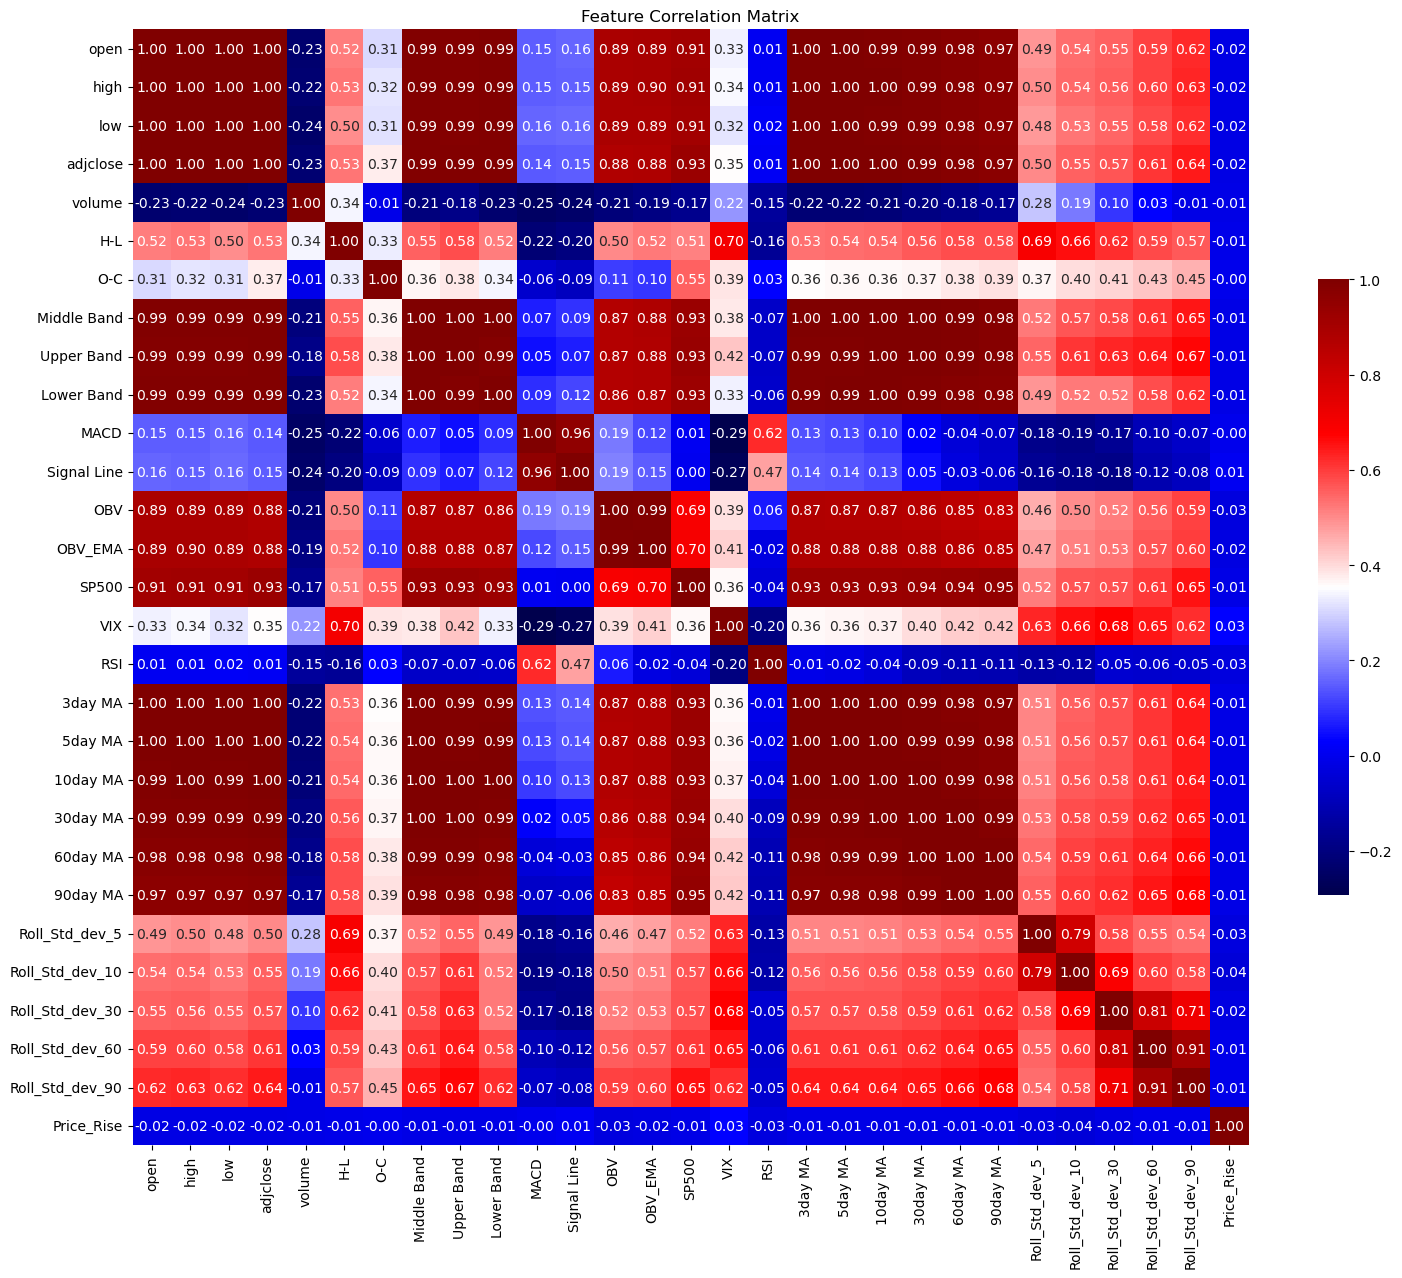

In [34]:
import seaborn as sns

# Calculate the correlation matrix for the features in your dataset
corr_matrix = dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='seismic', square=True, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Matrix')
plt.show()

### **EDA Analysis**

Do an EDA analysis of the above features. Present tables/figures and your
discussions.

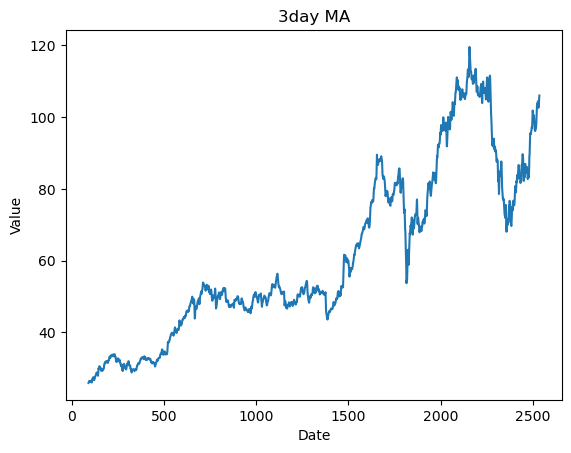

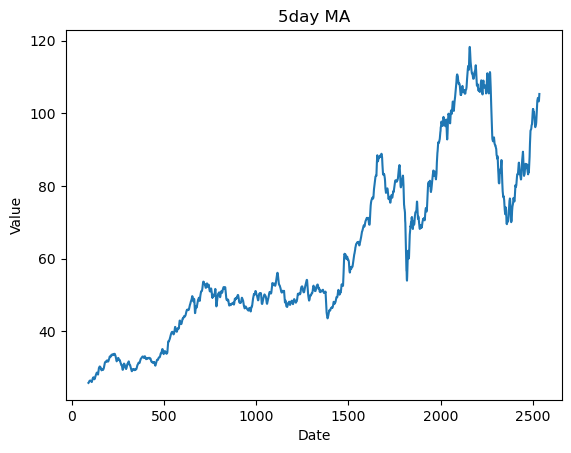

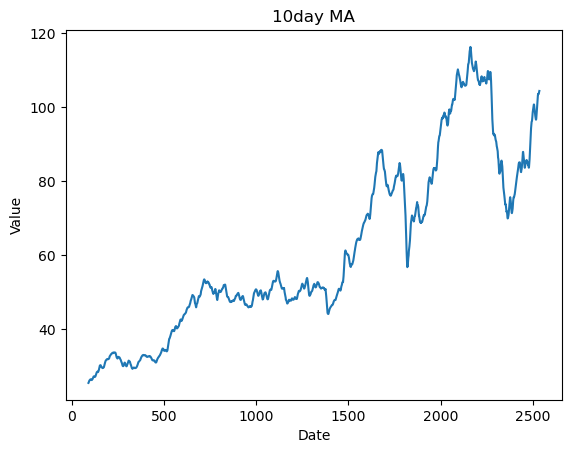

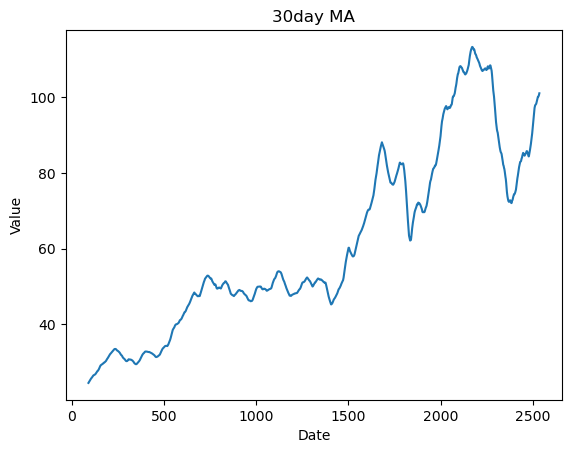

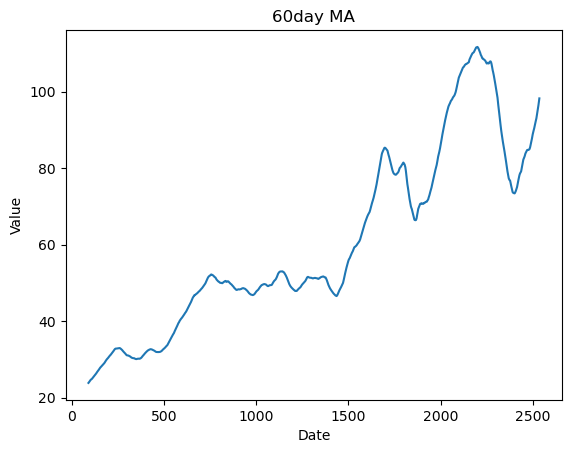

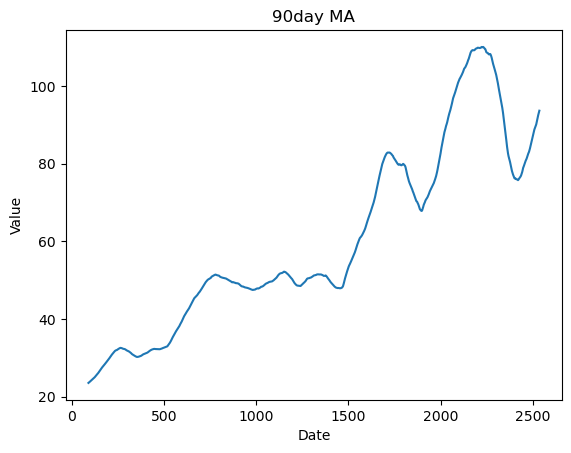

In [35]:
moving_averages = ['3day MA', '5day MA', '10day MA', '30day MA', '60day MA', '90day MA']

rolling_Std_Devs = ['Roll_Std_dev_5', 'Roll_Std_dev_10', 'Roll_Std_dev_30', 'Roll_Std_dev_60', 'Roll_Std_dev_90']

# Loop through each moving average and create an independent plot
for ma in moving_averages:
    plt.figure()  # This creates a new figure
    plt.plot(dataset[ma])
    plt.title(f'{ma}')
    plt.xlabel('Date')  # Assuming your DataFrame index is date
    plt.ylabel('Value')
    plt.show()

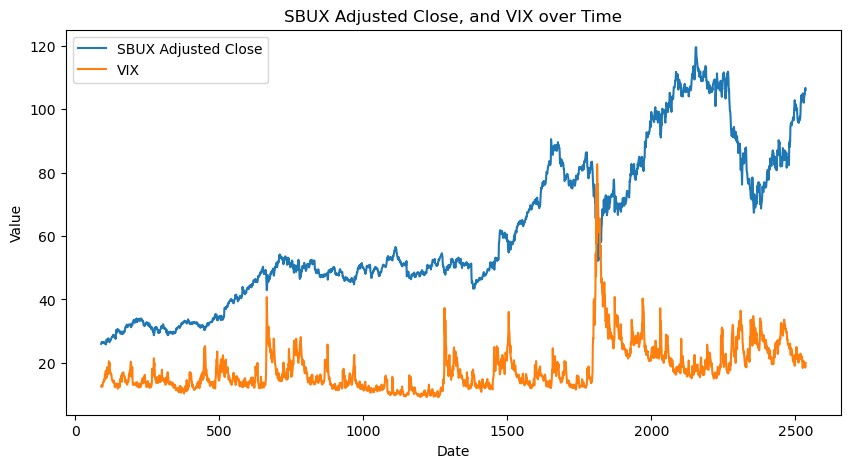

In [36]:

plt.figure(figsize=(10, 5))  # You can specify the figure size

plt.plot(dataset['adjclose'], label='SBUX Adjusted Close')  # Plot 'adjclose'
plt.plot(dataset['VIX'], label='VIX')  # Plot 'VIX'

plt.legend()  # This adds a legend using the labels provided in the `label` argument
plt.title('SBUX Adjusted Close, and VIX over Time')
plt.xlabel('Date')  # Assuming the index of the dataset is date
plt.ylabel('Value')
plt.show()

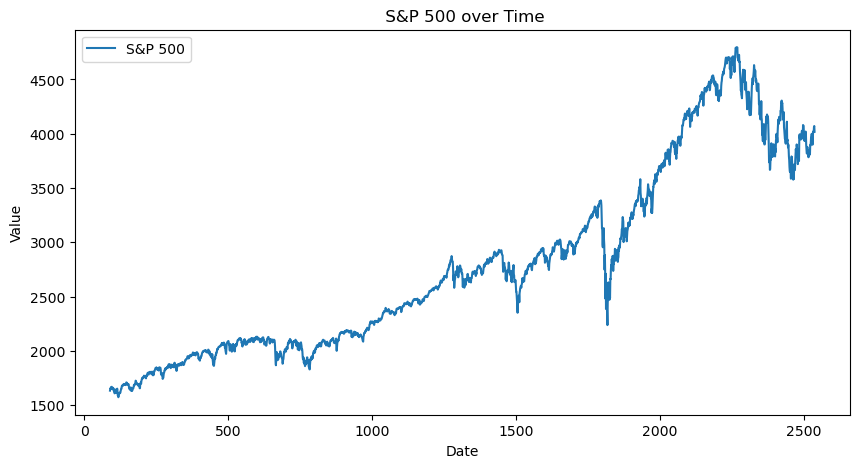

In [37]:

plt.figure(figsize=(10, 5))  # You can specify the figure size

plt.plot(dataset['SP500'], label='S&P 500')  # Plot 'SP500'

plt.legend()  # This adds a legend using the labels provided in the `label` argument
plt.title(' S&P 500 over Time')
plt.xlabel('Date')  # Assuming the index of the dataset is date
plt.ylabel('Value')
plt.show()

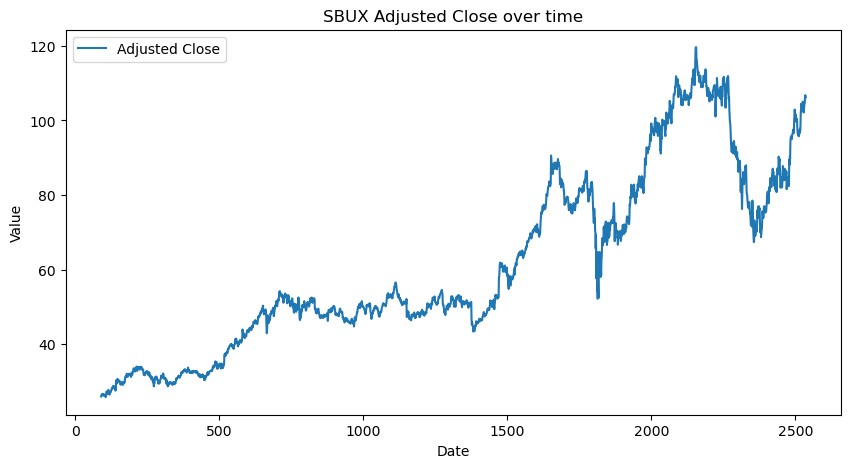

In [38]:

plt.figure(figsize=(10, 5))  # You can specify the figure size

plt.plot(dataset['adjclose'], label='Adjusted Close')  # Plot 'adjclose'


plt.legend()  # This adds a legend using the labels provided in the `label` argument
plt.title('SBUX Adjusted Close over time')
plt.xlabel('Date')  # Assuming the index of the dataset is date
plt.ylabel('Value')
plt.show()

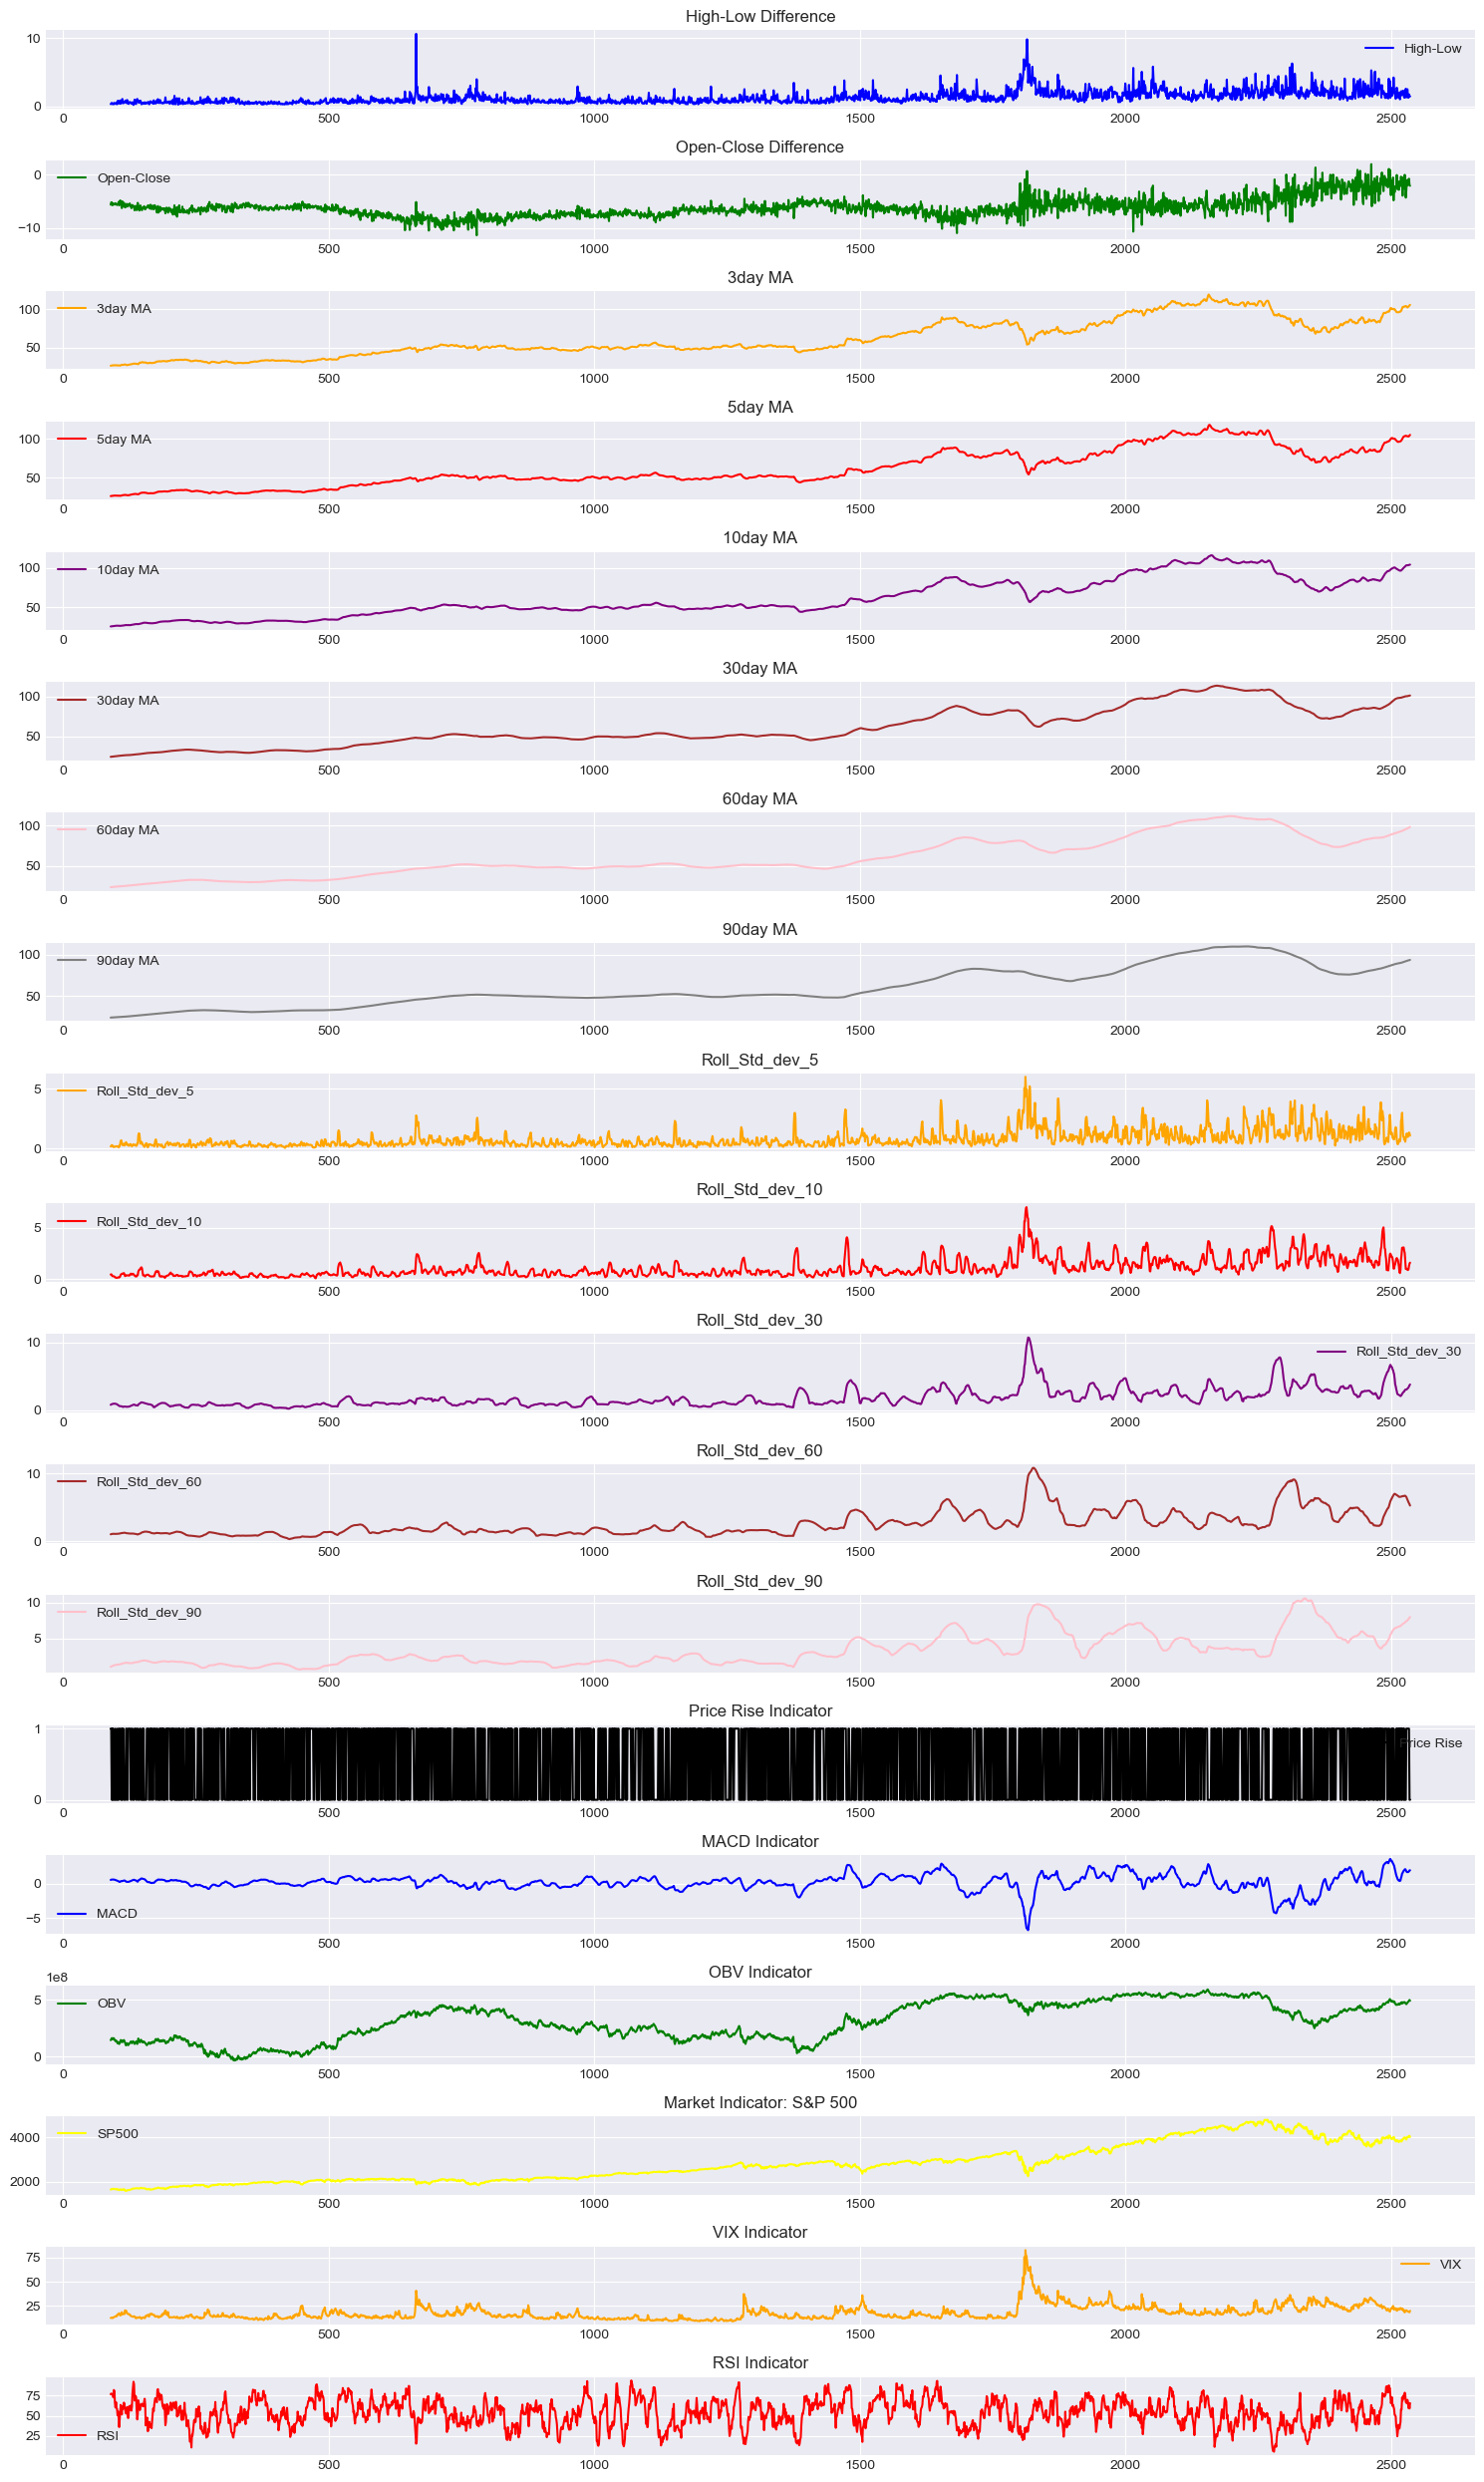

In [39]:
plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(nrows=19, ncols=1, figsize=(15, 25), sharex=False)

# Plot the high-low and open-close differences
axes[0].plot(dataset.index, dataset['H-L'], label='High-Low', color='blue')
axes[0].set_title('High-Low Difference')
axes[0].legend()

axes[1].plot(dataset.index, dataset['O-C'], label='Open-Close', color='green')
axes[1].set_title('Open-Close Difference')
axes[1].legend()

# Plot the moving averages
ma_columns = ['3day MA', '5day MA', '10day MA', '30day MA', '60day MA', '90day MA']
colors = ['orange', 'red', 'purple', 'brown', 'pink', 'gray']
for i, ma in enumerate(ma_columns):
    axes[i+2].plot(dataset.index, dataset[ma], label=f'{ma}', color=colors[i])
    axes[i+2].set_title(f'{ma}')
    axes[i+2].legend()

# Plot the rolling standard deviations
std_columns = ['Roll_Std_dev_5', 'Roll_Std_dev_10', 'Roll_Std_dev_30', 'Roll_Std_dev_60', 'Roll_Std_dev_90']
for i, std in enumerate(std_columns):
    axes[i+8].plot(dataset.index, dataset[std], label=f'{std}', color=colors[i])
    axes[i+8].set_title(f'{std}')
    axes[i+8].legend()

# Plot the Price_Rise
axes[13].plot(dataset.index, dataset['Price_Rise'], label='Price Rise', color='black')
axes[13].set_title('Price Rise Indicator')
axes[13].legend()

# Plot the MACD
axes[14].plot(dataset.index, dataset['MACD'], label='MACD', color='blue')
axes[14].set_title('MACD Indicator')
axes[14].legend()    

# Plot the OBV
axes[15].plot(dataset.index, dataset['OBV'], label='OBV', color='green')
axes[15].set_title('OBV Indicator')
axes[15].legend()

# Plot the SP500
axes[16].plot(dataset.index, dataset['SP500'], label='SP500', color='yellow')
axes[16].set_title('Market Indicator: S&P 500')
axes[16].legend()

# Plot the VIX
axes[17].plot(dataset.index, dataset['VIX'], label='VIX', color='orange')
axes[17].set_title('VIX Indicator')
axes[17].legend()

# Plot the RSI
axes[18].plot(dataset.index, dataset['RSI'], label='RSI', color='red')
axes[18].set_title('RSI Indicator')
axes[18].legend()

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

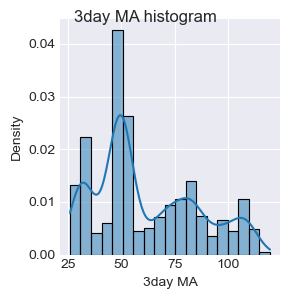

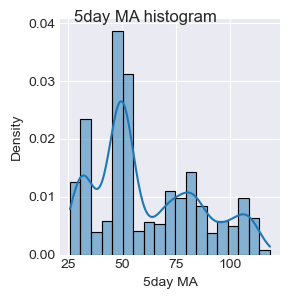

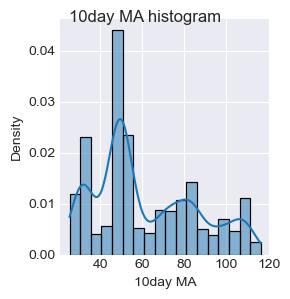

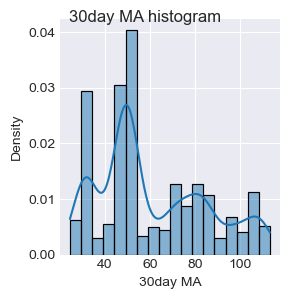

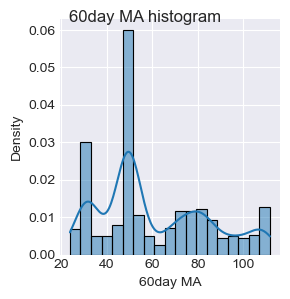

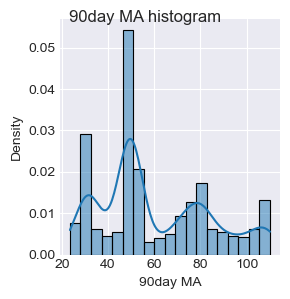

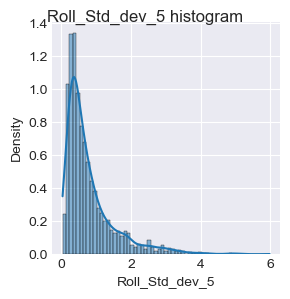

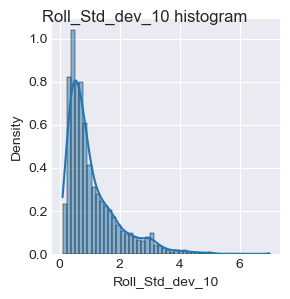

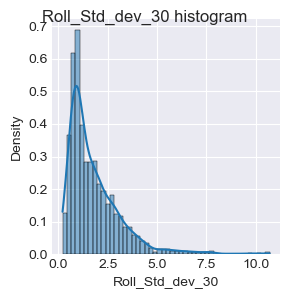

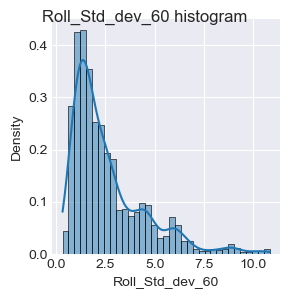

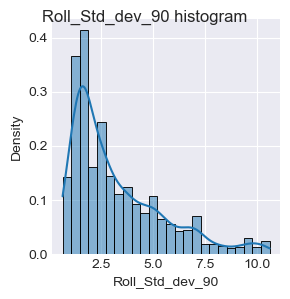

In [40]:
features = [
    '3day MA', '5day MA', '10day MA', '30day MA', '60day MA', '90day MA',
    'Roll_Std_dev_5', 'Roll_Std_dev_10', 'Roll_Std_dev_30', 'Roll_Std_dev_60', 'Roll_Std_dev_90'
]

# Iterate over each feature and create a FacetGrid for each one
for feature in features:
    chart = sns.FacetGrid(dataset)  # No need to specify 'col' if you have only one column per feature
    chart.map(sns.histplot, feature, kde=True, stat="density")  # Assuming you want to show the KDE and density
    chart.fig.suptitle(f'{feature} histogram')  # Set the title for each feature
    plt.show()

In [69]:
dataset.describe()


,open,high,low,adjclose,volume,H-L,O-C,Middle Band,Upper Band,Lower Band,...,30day MA,60day MA,90day MA,Roll_Std_dev_5,Roll_Std_dev_10,Roll_Std_dev_30,Roll_Std_dev_60,Roll_Std_dev_90,Price_Rise,Y_pred
count,2447.000000,2447.000000,2447.000000,2447.000000,2.447000e+03,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,...,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,490.000000
mean,67.689034,68.319217,67.047687,61.518754,8.904245e+06,1.271530,-6.170280,61.211153,64.201265,58.221041,...,61.023612,60.563572,60.141096,0.795248,1.089547,1.810964,2.620008,3.248252,0.519003,0.561224
std,23.452778,23.693134,23.211018,24.065576,4.572502e+06,0.937711,1.797331,23.948828,25.389641,22.658632,...,23.902973,23.782944,23.718628,0.729323,0.908197,1.388674,1.881272,2.214584,0.499741,0.496745
min,31.174999,31.530001,31.155001,25.785959,1.847800e+06,0.185001,-11.320297,24.970341,26.428096,23.512586,...,24.540243,23.855688,23.506753,0.033656,0.095688,0.208161,0.337847,0.637327,0.000000,0.000000
25%,53.495001,53.945000,53.085001,46.512066,6.110450e+06,0.629999,-7.291733,46.624659,48.095509,44.874015,...,46.697422,46.932931,47.476809,0.321683,0.466629,0.870329,1.298180,1.579250,0.000000,0.000000
50%,59.139999,59.680000,58.650002,51.853817,7.840400e+06,1.009998,-6.389889,51.610796,53.686080,49.896926,...,51.505573,51.283843,51.061874,0.546618,0.773805,1.366508,1.950906,2.507113,1.000000,1.000000
75%,85.795002,86.740002,84.660000,80.771381,1.030495e+07,1.610001,-5.509621,80.255092,85.229346,76.210981,...,80.014136,79.043580,79.213824,0.984916,1.410646,2.363773,3.360628,4.408744,1.000000,1.000000
max,126.080002,126.320000,124.809998,119.621155,6.209110e+07,10.619999,1.943298,114.357474,120.506189,108.780409,...,113.256195,111.665637,110.121159,5.978791,6.998042,10.701567,10.823762,10.620823,1.000000,1.000000


### **Price Prediction**

Use two machine learning classification methods (e.g., Logistic Regression and Extra Trees) to predict the price rise.

------------------------------------

#### **Preprocessing Dataset**

In [42]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [43]:
X

,volume,H-L,O-C,Middle Band,Upper Band,Lower Band,MACD,Signal Line,OBV,OBV_EMA,...,5day MA,10day MA,30day MA,60day MA,90day MA,Roll_Std_dev_5,Roll_Std_dev_10,Roll_Std_dev_30,Roll_Std_dev_60,Roll_Std_dev_90
90,5907000,0.309999,-5.615499,24.970341,26.428096,23.512586,0.551667,0.465155,146249200,1.306304e+08,...,25.838075,25.443422,24.540243,23.855688,23.506753,0.154398,0.462386,0.779585,1.039368,1.008447
91,7510600,0.395000,-5.185955,25.076993,26.590325,23.563661,0.574364,0.486997,153759800,1.328332e+08,...,25.883575,25.544497,24.624915,23.907094,23.544486,0.201121,0.482953,0.826407,1.064226,1.044920
92,9654600,0.489998,-5.158451,25.203059,26.751365,23.654753,0.603749,0.510347,163414400,1.357457e+08,...,25.993602,25.663810,24.700139,23.971639,23.583747,0.270918,0.440885,0.870397,1.094075,1.086360
93,6661400,0.309999,-5.713543,25.327646,26.797830,23.857462,0.602734,0.528825,156753000,1.377464e+08,...,26.130929,25.834730,24.790641,24.039220,23.624077,0.197453,0.310689,0.896911,1.097838,1.119029
94,6934400,0.320000,-5.358637,25.450212,26.889094,24.011329,0.614207,0.545901,163687400,1.402170e+08,...,26.229374,25.974246,24.868340,24.111049,23.661879,0.218630,0.307261,0.923867,1.105576,1.155506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,5517200,1.459999,-1.951408,101.641000,107.800930,95.481069,1.693271,1.728323,480185000,4.717536e+08,...,103.285010,103.565131,100.325434,96.769093,92.970029,0.951933,0.896432,3.232555,5.977301,7.592531
2533,5416900,1.239998,-1.278381,102.067551,107.824114,96.310988,1.706668,1.723992,485601900,4.730725e+08,...,103.263461,103.751227,100.420114,97.115832,93.127499,1.118026,0.954341,3.325311,5.765196,7.682502
2534,6324100,1.740005,-0.774979,102.535728,108.133121,96.938335,1.836790,1.746552,491926000,4.748681e+08,...,103.651326,103.847215,100.589560,97.478022,93.293864,1.324782,1.278671,3.497430,5.637121,7.793232
2535,6851100,1.420006,-1.960312,103.046022,108.198028,97.894017,1.938121,1.784866,498777100,4.771451e+08,...,104.532831,104.088158,100.787409,97.839728,93.489447,1.255230,1.521128,3.660165,5.467546,7.907215


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
X_test

,volume,H-L,O-C,Middle Band,Upper Band,Lower Band,MACD,Signal Line,OBV,OBV_EMA,...,5day MA,10day MA,30day MA,60day MA,90day MA,Roll_Std_dev_5,Roll_Std_dev_10,Roll_Std_dev_30,Roll_Std_dev_60,Roll_Std_dev_90
2047,4128900,2.059998,-7.048630,97.222324,103.185713,91.258935,0.740543,0.662678,544274400,5.498480e+08,...,99.312839,99.393639,97.329902,96.581347,92.898962,0.808582,0.760094,2.521191,2.555822,5.974554
2048,5211800,1.239998,-6.763077,97.143900,103.116803,91.170997,0.509809,0.632104,539062600,5.488208e+08,...,98.926981,99.409645,97.317984,96.688012,93.047691,1.433464,1.206110,2.529055,2.452397,5.922181
2049,8740300,3.409996,-7.528954,97.066328,103.067509,91.065147,0.290048,0.563693,530322300,5.470591e+08,...,98.351643,99.010918,97.283268,96.772143,93.172023,1.492939,1.512111,2.508677,2.391599,5.854985
2050,7542700,3.910004,-2.504028,97.072651,103.080587,91.064716,0.341512,0.519257,537865000,5.461834e+08,...,97.533128,98.591309,97.161909,96.827068,93.298187,1.481911,1.434133,2.512694,2.331626,5.790645
2051,7534000,2.659996,-6.204124,97.356903,102.896049,91.817756,0.309329,0.477271,530331000,5.446737e+08,...,97.521785,98.459959,97.168948,96.930977,93.464808,1.182696,1.383186,2.514055,2.271692,5.703883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,5517200,1.459999,-1.951408,101.641000,107.800930,95.481069,1.693271,1.728323,480185000,4.717536e+08,...,103.285010,103.565131,100.325434,96.769093,92.970029,0.951933,0.896432,3.232555,5.977301,7.592531
2533,5416900,1.239998,-1.278381,102.067551,107.824114,96.310988,1.706668,1.723992,485601900,4.730725e+08,...,103.263461,103.751227,100.420114,97.115832,93.127499,1.118026,0.954341,3.325311,5.765196,7.682502
2534,6324100,1.740005,-0.774979,102.535728,108.133121,96.938335,1.836790,1.746552,491926000,4.748681e+08,...,103.651326,103.847215,100.589560,97.478022,93.293864,1.324782,1.278671,3.497430,5.637121,7.793232
2535,6851100,1.420006,-1.960312,103.046022,108.198028,97.894017,1.938121,1.784866,498777100,4.771451e+08,...,104.532831,104.088158,100.787409,97.839728,93.489447,1.255230,1.521128,3.660165,5.467546,7.907215


In [45]:
#Dimensional Reduction

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error
print("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 0.49283608448101907


#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.35      0.43       241
           1       0.54      0.73      0.62       249

    accuracy                           0.54       490
   macro avg       0.55      0.54      0.52       490
weighted avg       0.55      0.54      0.53       490



#### Extra Trees

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [51]:
from sklearn.metrics import classification_report
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51       241
           1       0.55      0.60      0.57       249

    accuracy                           0.54       490
   macro avg       0.54      0.54      0.54       490
weighted avg       0.54      0.54      0.54       490



### **Cross Validation for Price Predictions**

 For each method, run a cross-validation to calculate the mean and standard deviation of the accuracy.

In [52]:
from sklearn.model_selection import cross_val_score

X_scaled = sc.fit_transform(X)
clf = LogisticRegression(max_iter=10000)
clf_cv_scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (clf_cv_scores.mean(), clf_cv_scores.std() * 2))

Logistic Regression Accuracy: 0.52 (+/- 0.02)


In [53]:
classifier = ExtraTreesClassifier(random_state=101)
extra_trees_cv_scores = cross_val_score(classifier, X_scaled, y, cv=5, scoring='accuracy')
print("Extra Trees Classifier Accuracy: %0.2f (+/- %0.2f)" % (extra_trees_cv_scores.mean(), extra_trees_cv_scores.std() * 2))

Extra Trees Classifier Accuracy: 0.51 (+/- 0.04)


### **Price Prediction Evaluation**

Present an evaluation of these methods based on the outputs.

Use one method (e.g., Extra Trees) to predict the price rise based on your X_test data. Use the test set to obtain a classification report. Draw a plot of the confusion matrix and a ROC plot.

In [54]:
# Choosing the Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.35      0.43       241
           1       0.54      0.73      0.62       249

    accuracy                           0.54       490
   macro avg       0.55      0.54      0.52       490
weighted avg       0.55      0.54      0.53       490



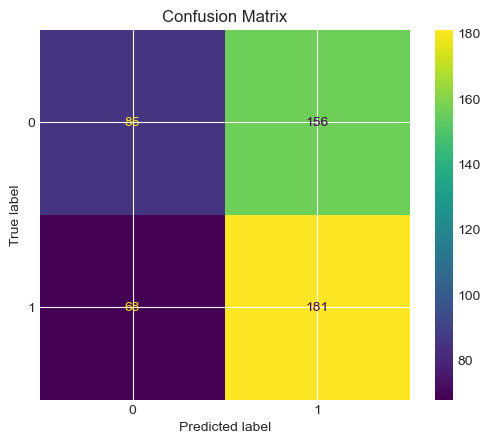

In [56]:
# Evaluate the model by means of a Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

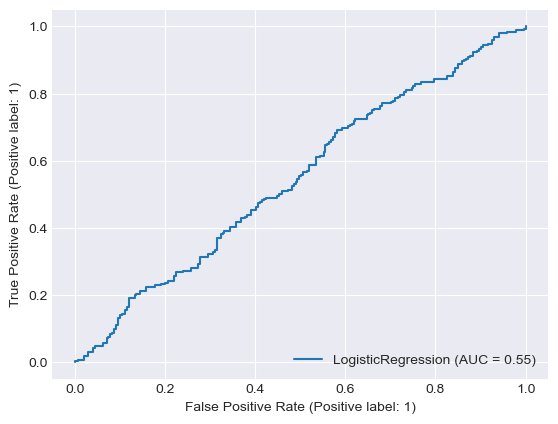

In [57]:
# Evaluate the model by means of a ROC Curve, which only works for a binary target.

from sklearn.metrics import RocCurveDisplay
log_disp = RocCurveDisplay.from_estimator(clf, X_test, Y_test)

In [58]:
# Choosing the Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(random_state=101)
classifier.fit(X_train, Y_train)

ExtraTreesClassifier(random_state=101)

In [59]:
from sklearn.metrics import classification_report
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51       241
           1       0.55      0.60      0.57       249

    accuracy                           0.54       490
   macro avg       0.54      0.54      0.54       490
weighted avg       0.54      0.54      0.54       490



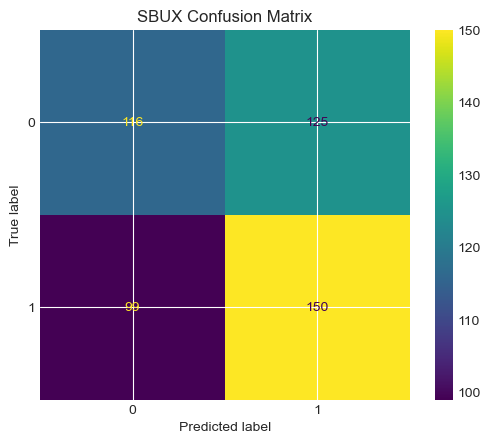

In [60]:
# Evaluate the model by means of a Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ['0', '1'] 
matrix = ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, display_labels=labels)  
plt.title('SBUX Confusion Matrix')
plt.show(matrix)
plt.show()

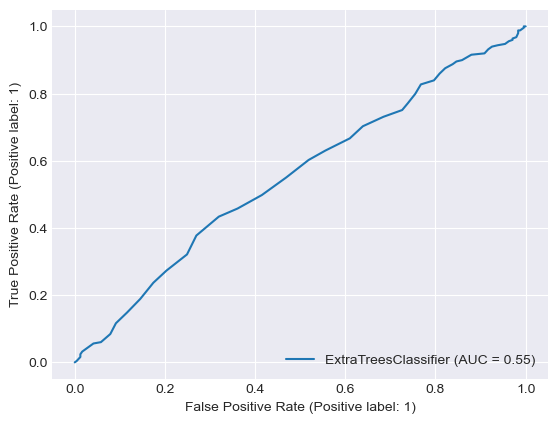

In [61]:
# Evaluate the model by means of a ROC Curve, which only works for a binary target.

from sklearn.metrics import RocCurveDisplay
log_disp = RocCurveDisplay.from_estimator(classifier, X_test, Y_test)

### **Price Predictions Market Returns vs Strategy Returns**

Create the columns of Market Returns and Strategy Returns based on your
prediction of price rise.

In [62]:
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()
trade_dataset

,open,high,low,adjclose,volume,H-L,O-C,Middle Band,Upper Band,Lower Band,...,30day MA,60day MA,90day MA,Roll_Std_dev_5,Roll_Std_dev_10,Roll_Std_dev_30,Roll_Std_dev_60,Roll_Std_dev_90,Price_Rise,Y_pred
2047,104.750000,105.279999,103.220001,97.701370,4128900,2.059998,-7.048630,97.222324,103.185713,91.258935,...,97.329902,96.581347,92.898962,0.808582,0.760094,2.521191,2.555822,5.974554,0,0.0
2048,102.989998,102.989998,101.750000,96.226921,5211800,1.239998,-6.763077,97.143900,103.116803,91.170997,...,97.317984,96.688012,93.047691,1.433464,1.206110,2.529055,2.452397,5.922181,0,1.0
2049,103.339996,103.339996,99.930000,95.811043,8740300,3.409996,-7.528954,97.066328,103.067509,91.065147,...,97.283268,96.772143,93.172023,1.492939,1.512111,2.508677,2.391599,5.854985,1,1.0
2050,101.160004,104.510002,100.599998,98.655975,7542700,3.910004,-2.504028,97.072651,103.080587,91.064716,...,97.161909,96.827068,93.298187,1.481911,1.434133,2.512694,2.331626,5.790645,0,0.0
2051,104.000000,105.769997,103.110001,97.795876,7534000,2.659996,-6.204124,97.356903,102.896049,91.817756,...,97.168948,96.930977,93.464808,1.182696,1.383186,2.514055,2.271692,5.703883,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,106.400002,106.870003,105.410004,104.448593,5517200,1.459999,-1.951408,101.641000,107.800930,95.481069,...,100.325434,96.769093,92.970029,0.951933,0.896432,3.232555,5.977301,7.592531,1,1.0
2533,106.059998,107.139999,105.900002,104.781616,5416900,1.239998,-1.278381,102.067551,107.824114,96.310988,...,100.420114,97.115832,93.127499,1.118026,0.954341,3.325311,5.765196,7.682502,1,0.0
2534,107.300003,108.800003,107.059998,106.525024,6324100,1.740005,-0.774979,102.535728,108.133121,96.938335,...,100.589560,97.478022,93.293864,1.324782,1.278671,3.497430,5.637121,7.793232,1,1.0
2535,108.739998,109.760002,108.339996,106.779686,6851100,1.420006,-1.960312,103.046022,108.198028,97.894017,...,100.787409,97.839728,93.489447,1.255230,1.521128,3.660165,5.467546,7.907215,0,1.0


In [63]:
trade_dataset['Market Returns'] = 0.
trade_dataset['Market Returns'] = np.log(trade_dataset['adjclose']/trade_dataset['adjclose'].shift(1))
trade_dataset['Market Returns'] = trade_dataset['Market Returns'].shift(-1)

In [64]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['Y_pred'] == True, 
trade_dataset['Market Returns'], - trade_dataset['Market Returns'])

In [65]:
trade_dataset

,open,high,low,adjclose,volume,H-L,O-C,Middle Band,Upper Band,Lower Band,...,90day MA,Roll_Std_dev_5,Roll_Std_dev_10,Roll_Std_dev_30,Roll_Std_dev_60,Roll_Std_dev_90,Price_Rise,Y_pred,Market Returns,Strategy Returns
2047,104.750000,105.279999,103.220001,97.701370,4128900,2.059998,-7.048630,97.222324,103.185713,91.258935,...,92.898962,0.808582,0.760094,2.521191,2.555822,5.974554,0,0.0,-0.015206,0.015206
2048,102.989998,102.989998,101.750000,96.226921,5211800,1.239998,-6.763077,97.143900,103.116803,91.170997,...,93.047691,1.433464,1.206110,2.529055,2.452397,5.922181,0,1.0,-0.004331,-0.004331
2049,103.339996,103.339996,99.930000,95.811043,8740300,3.409996,-7.528954,97.066328,103.067509,91.065147,...,93.172023,1.492939,1.512111,2.508677,2.391599,5.854985,1,1.0,0.029261,0.029261
2050,101.160004,104.510002,100.599998,98.655975,7542700,3.910004,-2.504028,97.072651,103.080587,91.064716,...,93.298187,1.481911,1.434133,2.512694,2.331626,5.790645,0,0.0,-0.008756,0.008756
2051,104.000000,105.769997,103.110001,97.795876,7534000,2.659996,-6.204124,97.356903,102.896049,91.817756,...,93.464808,1.182696,1.383186,2.514055,2.271692,5.703883,1,1.0,0.043127,0.043127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,106.400002,106.870003,105.410004,104.448593,5517200,1.459999,-1.951408,101.641000,107.800930,95.481069,...,92.970029,0.951933,0.896432,3.232555,5.977301,7.592531,1,1.0,0.003183,0.003183
2533,106.059998,107.139999,105.900002,104.781616,5416900,1.239998,-1.278381,102.067551,107.824114,96.310988,...,93.127499,1.118026,0.954341,3.325311,5.765196,7.682502,1,0.0,0.016502,-0.016502
2534,107.300003,108.800003,107.059998,106.525024,6324100,1.740005,-0.774979,102.535728,108.133121,96.938335,...,93.293864,1.324782,1.278671,3.497430,5.637121,7.793232,1,1.0,0.002388,0.002388
2535,108.739998,109.760002,108.339996,106.779686,6851100,1.420006,-1.960312,103.046022,108.198028,97.894017,...,93.489447,1.255230,1.521128,3.660165,5.467546,7.907215,0,1.0,-0.005703,-0.005703


### **Cumulative M.R. vs Cumulative S.R.**

Create the columns of Cumulative Market Returns and Cumulative Strategy Returns based on your prediction of price rise. Plot the time series of these two returns.

In [66]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Market Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

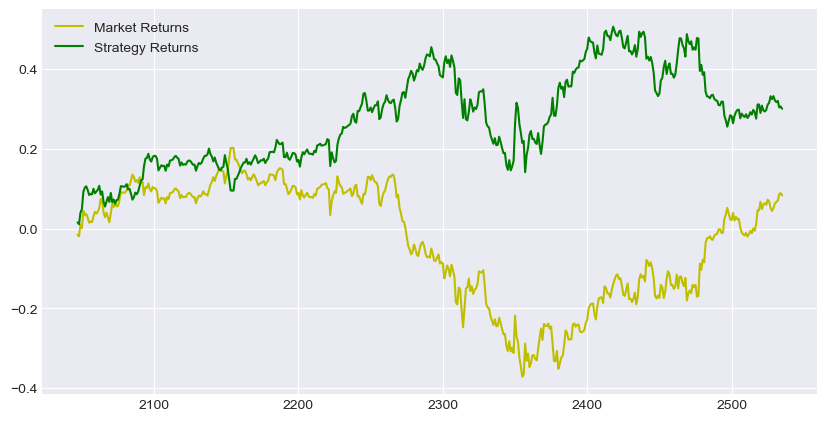

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='y', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

## **ASSUMPTIONS**

Choose one of the assumptions: Machine learning can/cannot predict the rise of the selected stock price data. Provide interpretation and debate based on your results and your selected literature.

Machine learning can predict the rise of selected stock price data to some degree, but with several caveats and limitations:

**Historical Patterns:** Machine learning models can identify patterns in historical data that may indicate a rise in stock prices. By learning from past trends, seasonality, and other factors, models can make educated guesses about future movements.

**Feature Relevance:** The predictive power of a model heavily depends on the relevance and quality of the features used. Technical indicators, market sentiment, economic indicators, and other relevant features can provide valuable information for predictions.

**Market Efficiency:** Financial markets are considered to be efficient to various degrees. This means that all available information is already factored into stock prices, making it challenging for models to find edges consistently.

**Random Walk Hypothesis:** According to this hypothesis, stock price changes are random and unpredictable. While not universally accepted, it suggests caution in assuming that past behavior can predict future prices.

**Overfitting:** Models that seem to predict stock prices well on historical data may simply be overfit to past data and may not perform well on unseen data.

**Regulatory Compliance:** Predictive models must comply with all financial regulations and ethical standards.

**Risk of Loss:** There is always a risk of loss when trading stocks based on model predictions, as numerous unforeseen events can impact stock prices.

In summary, while machine learning can provide tools for analyzing and predicting stock price movements, it is not a guaranteed or foolproof method. Predictions are probabilistic, not certain, and models need to be used in conjunction with sound investment strategies and risk management practices.